# Decision Tree

Realizando os imports e inicializando o dataframe com o arquivo CSV

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

CSV_FULL_PATH = '../CSVs/pokemon.csv'

data_pandas = pd.read_csv(CSV_FULL_PATH)
df = pd.DataFrame(data_pandas)

x = df.drop(['attack', 'defense', 'sp_attack', 'sp_defense', 'is_legendary', 'name'], axis=1)
y = df['is_legendary']

## Separando os dados, definindo o número 'k' de vizinhos e testando o modelo

In [2]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 16)

for n_neighbors in neighbors_settings:
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(x_train, y_train)

    training_accuracy.append(model.score(x_train, y_train))
    test_accuracy.append(model.score(x_test, y_test))


## Visualizando o resultado

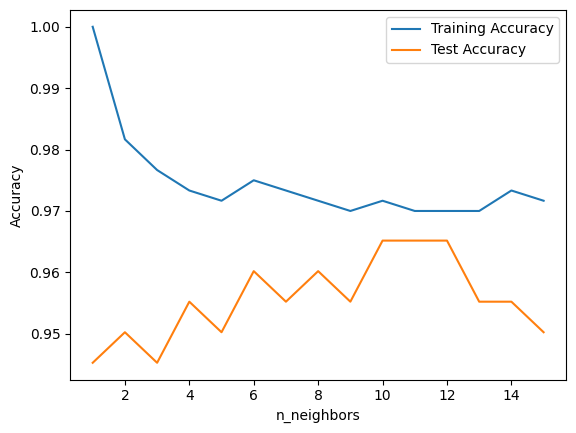

In [3]:
plt.plot(neighbors_settings, training_accuracy, label='Training Accuracy')
plt.plot(neighbors_settings, test_accuracy, label='Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()